In [1]:
#CSC467 Fall Semester 2022, LSUS 
#Machine Learning Project

"""For this class project, we are creating different models of regression.
#Disclaimer: The project was inspired by Yohanes Nuwara's Prediction of Critical Temperature
of Superconductors using CART Models on Kaggle.
Link: https://www.kaggle.com/code/yohanesnuwara/superconductor-prediction-rfr"""

"""The different is that, we want to make a more simpler version that is 
more starter friendly. Ultilizing methods that are learned in class and considered 
more familiar us and to gain similar results, while experimenting on different 
machine learning models.
Link to dataset: https://archive.ics.uci.edu/ml/datasets/superconductivty+data"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import seaborn as sns
from scipy import linalg as la


from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn import *
from sklearn import (datasets, metrics, 
                     model_selection as skms,
                    )








In [2]:
#importing the dataset
df = pd.read_csv('train.csv')
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
#Attributes of each superconductors in the dataset
x = df.drop('critical_temp',axis = 1 )
x 

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [4]:
#Critical temperatures
y = df['critical_temp']
y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [5]:
# splitting the data for training and testing
(temp_train_ftrs, temp_test_ftrs, 
 temp_train_tgt,  temp_test_tgt) = skms.train_test_split(x,
                                                         y, 
                                                         test_size=.2)
 
print("Train features shape:",temp_train_ftrs.shape)
print("Test features shape:",  temp_test_ftrs.shape)
 

Train features shape: (17010, 81)
Test features shape: (4253, 81)


In [6]:
#training the model
model = LinearRegression()
fit = model.fit(temp_train_ftrs, temp_train_tgt)
predictions = fit.predict(temp_test_ftrs) 



model.score(temp_test_ftrs, temp_test_tgt)



0.743569923291454

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


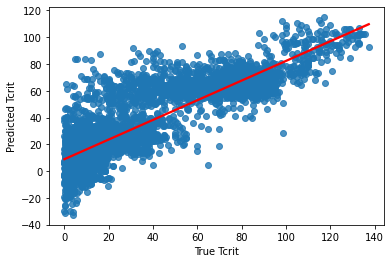

Score:  0.743569923291454


In [7]:
#plot for later comparision between the train set and prediction set
xtest = temp_test_tgt
ypred = predictions
sns.regplot(xtest, ypred, df, line_kws={"color": "red"})
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
#plt.gca().set_aspect('equal')
plt.show()
print("Score: ", model.score(temp_test_ftrs, temp_test_tgt))


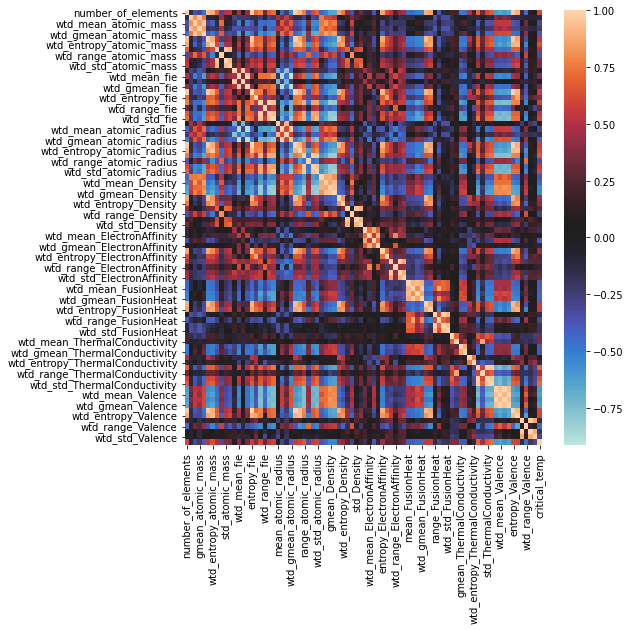

In [8]:
#Correlation heatmap
#As we can see, there are high correlations between certain attributes and the critical temperature, as shown by the orange squares.
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), cmap='icefire')

In [9]:
"""because of the large size of the data (21263 instances using 
RandomRegressorModels returns it in an impractical amount of time. 
(longest run was >30 minutes with no result)"""

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#split the data into other attributes and crit temp
#self note: the ":" means select all, and iloc inputs are iloc[row, collumn]
x1 = df.iloc[:,:-1] #select all rows and column but the last one, this is the attributes data
y1 = df.iloc[:,-1] #select all rows of the last column (crit temp)





In [10]:
#PCA

#scale the data
scaling=StandardScaler()
scaling.fit(x1)
scaled_df=scaling.transform(x1)



In [11]:
#get the singular values to see how important each components are
pca_test = PCA()
pca_test.fit(scaled_df)
pca_test.singular_values_






array([818.85501106, 424.89457115, 404.94927264, 369.04616579,
       318.29076716, 255.43528413, 249.77218573, 231.33049472,
       201.65691841, 184.56727744, 177.45426986, 158.49752879,
       142.46549386, 131.14162357, 130.0815772 , 116.01781604,
       111.26449726,  96.74779816,  91.23794606,  81.07790436,
        72.15305864,  70.251637  ,  66.46364343,  59.72507426,
        58.28111116,  56.64315036,  54.11624163,  49.55681863,
        46.63862646,  44.52900941,  41.99764646,  40.67100813,
        39.79004626,  35.18432753,  34.34603963,  32.7016051 ,
        31.35342269,  29.13832877,  27.42932732,  26.98118975,
        23.70016979,  22.95755887,  21.03820938,  20.22164571,
        19.62122159,  19.25949323,  18.39722436,  17.97356384,
        17.64443795,  17.37219997,  16.41153241,  16.27576662,
        14.77283416,  14.38205498,  14.24762236,  13.47723535,
        12.39908658,  11.83808031,  11.73149547,  11.1212578 ,
        10.56164658,   9.89954374,   8.74156333,   8.70

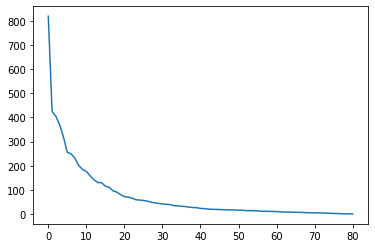

In [12]:
# Ploting all of the singular values of all the attributes, we can see that around 20 components contribute to most of the data
plt.plot(pca_test.singular_values_)

In [13]:
#Dimensionality reduction, in this case we decide 20 will be good enough.
pca = PCA(n_components=20)

pca.fit(scaled_df)

df1 = pca.transform(scaled_df)
print(df1.shape)



(21263, 20)


In [14]:
#"label" the Principal Components
pca_n = np.arange(20)
pca_n = ['PC'+str(i) for i in pca_n]
df1 = pd.DataFrame(df1, columns=pca_n)
df1


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-3.664487,0.991643,3.045260,1.713725,0.246057,-0.203213,0.450996,-0.220078,-0.384088,0.220391,0.632356,0.150976,-0.521102,-0.018953,-0.250735,0.733282,0.266930,-0.245861,-0.143893,-0.345883
1,-4.555468,-0.214585,1.722873,1.111493,0.981005,-1.011501,-0.245300,0.214118,0.408239,-1.139334,1.057395,0.565372,-0.605457,-0.010468,-0.825380,1.200854,1.000602,-0.395044,0.428128,0.039389
2,-3.488176,1.055167,3.130821,1.811590,0.296335,-0.211822,0.485278,0.010470,-0.496751,0.180617,0.737591,0.143143,-0.565998,-0.019706,-0.277233,0.762102,0.310669,-0.152040,-0.122112,-0.355205
3,-3.581284,1.020144,3.084663,1.760859,0.270516,-0.208458,0.466648,-0.108675,-0.439150,0.199967,0.684029,0.147397,-0.542792,-0.019169,-0.263630,0.748061,0.287161,-0.200828,-0.134157,-0.350200
4,-3.809671,0.948297,2.981358,1.627398,0.199680,-0.188464,0.426050,-0.426505,-0.279207,0.263086,0.533304,0.156691,-0.481156,-0.019272,-0.226958,0.702308,0.233020,-0.327232,-0.158862,-0.338109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,2.350607,-0.387111,-1.449530,-2.426772,2.911041,-1.754652,0.114288,-1.041992,-0.186578,1.235675,-1.220777,-0.381471,-1.449390,-0.293494,1.400369,-1.565300,0.332343,0.627125,-0.069797,-0.156040
21259,-5.446209,-0.780202,1.336464,-0.290010,1.142610,0.236224,0.988120,-0.775729,0.324684,-0.793209,-1.033398,-0.073588,-1.077443,-0.188028,0.071990,-0.435233,0.079490,-0.735326,0.050547,0.211263
21260,10.477462,-0.931943,1.572640,-0.372598,-0.214181,-1.304829,-0.814939,0.052747,-0.720376,-0.347597,0.003665,-0.939782,0.558037,-0.903610,-0.272140,-0.020407,0.714245,-0.594255,0.002514,0.937514
21261,9.771885,-1.001345,1.215602,-0.872021,-0.954733,-0.674221,-0.754652,-1.624888,0.146395,-0.065916,-0.227885,-0.586942,0.764901,-1.059362,-0.479106,0.021577,0.580674,-0.713638,0.007578,0.735327


In [15]:
# splitting the new "compressed" data for training and testing
(temp_train_ftrs1, temp_test_ftrs1, 
 temp_train_tgt1,  temp_test_tgt1) = skms.train_test_split(df1,
                                                         y1, 
                                                         test_size=.3)
 
print("Train features shape:",temp_train_ftrs1.shape)
print("Test features shape:",  temp_test_ftrs1.shape)
 

Train features shape: (14884, 20)
Test features shape: (6379, 20)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


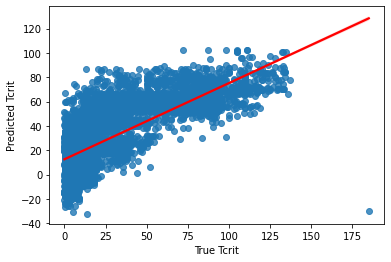

Score:  0.6289890714767348


In [16]:
#rerunning LinearRegression to see how much different it is between the one above
#as you can see, they are almost the same

linear = LinearRegression()
fit = linear.fit(temp_train_ftrs1, temp_train_tgt1)
predictions1 = fit.predict(temp_test_ftrs1) 


xtest1 = temp_test_tgt1
ypred1 = predictions1
sns.regplot(xtest1, ypred1, df1, line_kws={"color": "red"})
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
#plt.gca().set_aspect('equal')
plt.show()
print("Score: ", linear.score(temp_test_ftrs1, temp_test_tgt1))

In [ ]:
#using RandomForestRegressor, takes less than 1 minutes on Google Colab comparing to if we didn't use PCA.
RFR = RandomForestRegressor()
fit = RFR.fit(temp_train_ftrs1, temp_train_tgt1)
predictions_rfr = fit.predict(temp_test_ftrs1)

In [ ]:
#plotting the result
xtest2 = temp_test_tgt1
ypred2 = predictions_rfr
sns.regplot(xtest2, ypred2, df1, line_kws={"color": "red"})
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
plt.gca().set_aspect('equal')
plt.show()
print("Score: ", RFR.score(temp_test_ftrs1, temp_test_tgt1))

In [ ]:
#Ridge Regression


ridge = Ridge(alpha = 1000)
fit = ridge.fit(temp_train_ftrs1, temp_train_tgt1)
predictions_ridge = ridge.predict(temp_test_ftrs1)


In [ ]:
xtest3 = temp_test_tgt1
ypred3 = predictions_ridge 
sns.regplot(xtest3, ypred3, df1, line_kws={"color": "red"})
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
#plt.gca().set_aspect('equal')
plt.show()
print("Score: ", ridge.score(temp_test_ftrs1, temp_test_tgt1))

In [ ]:
# experimenting making a tiny set of training data for ridge regression
(temp_train_ftrs2, temp_test_ftrs2, 
 temp_train_tgt2,  temp_test_tgt2) = skms.train_test_split(df1,
                                                         y1,test_size=.99)
ridge = Ridge(alpha = 200)
fit = ridge.fit(temp_train_ftrs2, temp_train_tgt2)
predictions_ridge2 = ridge.predict(temp_test_ftrs2)
                                                        

xtest4 = temp_test_tgt2
ypred4 = predictions_ridge2
sns.regplot(xtest4, ypred4, df1, line_kws={"color": "red"})
plt.xlabel('True Tcrit')
plt.ylabel('Predicted Tcrit')
#plt.gca().set_aspect('equal')
plt.show()
print("Score: ", ridge.score(temp_test_ftrs2, temp_test_tgt2))

In [ ]:
#Score comparison:
print("Linear regression score: ", model.score(temp_test_ftrs, temp_test_tgt))
print("Linear regression score with PCA: ", linear.score(temp_test_ftrs1, temp_test_tgt1))
print("Random forest regression score with PCA: ", RFR.score(temp_test_ftrs1, temp_test_tgt1))
print("Ridge regression score with PCA: ", ridge.score(temp_test_ftrs1, temp_test_tgt1))


In [ ]:
"""
Conclusion: While using the whole dataset gives better result for linear regression, linear regression utilizing PCA 
did a bit worst - it seems more sensitive to the loss of data. 
However, RFR can't run in a reasonable amount of time without PCA, we do not have the result because we gave up after waiting for
over 30 minutes. With PCA, the run time for RFR model is less than 1 minutes, with a rather decent score.
Ridge Regression did the worst because the model doesn't need regularization, any attempt to increase regularization strength made it worst. 
""" 